# Business Objective

##### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

##### Importing the Libraries

In [23]:
pip install itables

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: itables in c:\users\hp\anaconda3\lib\site-packages (1.6.2)



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
#Reading data from csv file using Pandas
loans = pd.read_csv("loan.csv",low_memory=False)
loans.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [27]:
loans.shape

(39717, 111)

In [28]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Understanding data in term of business understanding

We categorize our data in three types of variables below and consider below variables as our basis of analysis.

#### Customer's Demographic Information:

1. emp_title
2. emp_length
3. home_ownership
4. annual_inc
5. verification_status
6. addr_state
7. zip_code
8. title
9. purpose
10. desc
11. url

#### Loan Characteristics Information
			
1. loan_amnt
2. funded_amnt
3. funded_amnt_inv
4. int_rate
5. loan_status
6. grade
7. sub_grade
8. dti
9. loan_issue_d
10. term
11. installment
#### Credit information: Customer Behaviour variables
1. delinq_2yrs
2. earliest_cr_line
3. inq_last_6mths
4. open_acc
5. pub_rec
6. revol_bal
7. revol_util
8. total_acc
9. out_prncp
10. out_prncp_inv
11. total_pymnt
12. total_pymnt_inv
13. total_rec_prncp
14. total_rec_int
15. total_rec_late_fee
16. recoveries
17. collection_recovery_fee
18. last_pymnt_d
19. last_pymnt_amnt
20. next_pymnt_d
21. last_credit_pull_d
22. application_type

All other variables are not associated in identifying the default as they come in picture when the loan is approved. But we are focused if we want to approve loan in te first place or not.

To meet business objective we will only consider the Customer Demographic and Loan Attributes and we will ignore the Customer behaviour attributes as these will not be known during the time of application.

In [29]:
# Retaining only customer demographic and loan attributes.
column_list = ['emp_title',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'addr_state',
'purpose',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'int_rate',
'loan_status',
'grade',
'sub_grade',
'dti',
'issue_d',
'term',
'installment'
]

column_removal_list = [x for x in loans.columns if x not in column_list]
#column_removal_list
for col in column_removal_list:
    loans = loans.drop(col, axis=1)

In [30]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti'],
      dtype='object')

In [31]:
loans.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  39717.000000  39717.000000     39717.000000  39717.000000   
mean   11219.443815  10947.713196     10397.448868    324.561922   
std     7456.670694   7187.238670      7128.450439    208.874874   
min      500.000000    500.000000         0.000000     15.690000   
25%     5500.000000   5400.000000      5000.000000    167.020000   
50%    10000.000000   9600.000000      8975.000000    280.220000   
75%    15000.000000  15000.000000     14400.000000    430.780000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti  
count  3.971700e+04  39717.000000  
mean   6.896893e+04     13.315130  
std    6.379377e+04      6.678594  
min    4.000000e+03      0.000000  
25%    4.040400e+04      8.170000  
50%    5.900000e+04     13.400000  
75%    8.230000e+04     18.600000  
max    6.000000e+06     29.990000

##### Removing rows with loan status as Current - We will only consider with Loan Status as Fully paid or charged off.

In [32]:
loans = loans[~(loans['loan_status'] == 'Current')]
loans.shape

(38577, 18)

In [33]:
# Column-wise null percentage
round(100*(loans.isnull().sum()/len(loans.index)), 2).to_frame('percentage')

percentage
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.68
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00

#### Data Cleaning & Deriving New Variables

We will derive below variables to determine defaults.

1. emp_length [Extracting Integer from String] - We will extract the numeric value from employee length variable.
2. loan_to_annual_income [Calculated by dividing "loan_amount" by "annual_income"] - We will use this value for determining defaults
3. Issue_Year [Extracting "Year" out of "MMM-YY" format] - We will calculate the issue year of loan and create yearly distribution of loans in different category.

In [34]:
#Extracting integer from String 
loans['emp_length'] = loans['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))

#Removing the rows where experience is 'Empty String'
loans = loans[loans['emp_length']!='']
loans.shape

(37544, 18)

In [35]:
# Loan to annual income variable
import datetime
loans['loan_to_annual_income'] = round(loans['loan_amnt']/loans['annual_inc'],2)
loans['issue_year'] = loans['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)
loans = loans.reset_index(drop=True)
loans.shape

(37544, 20)

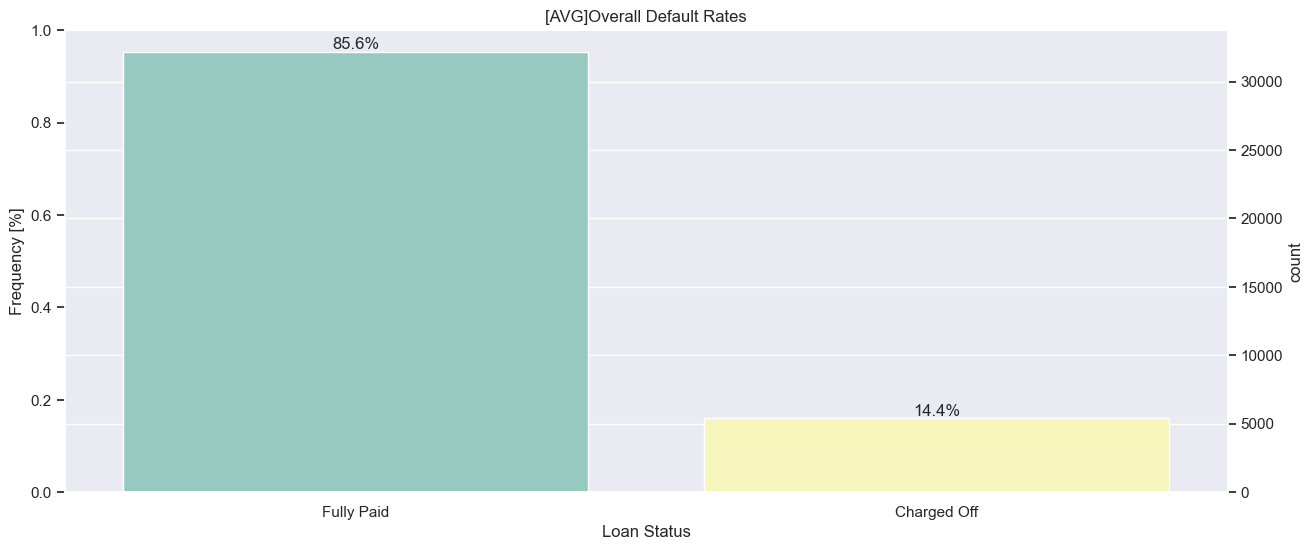

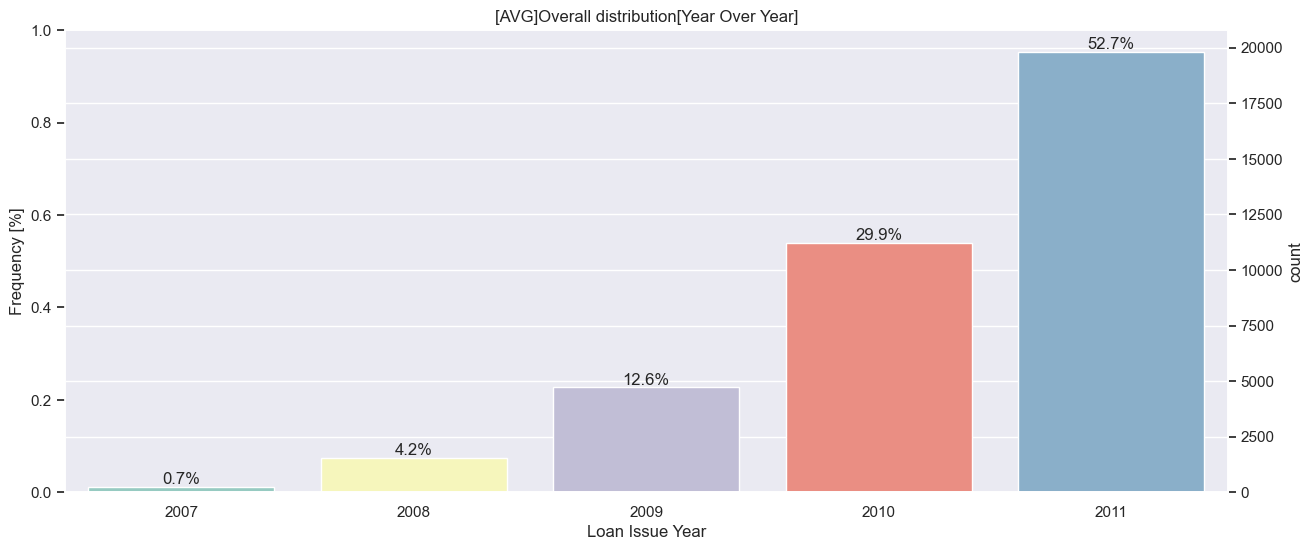

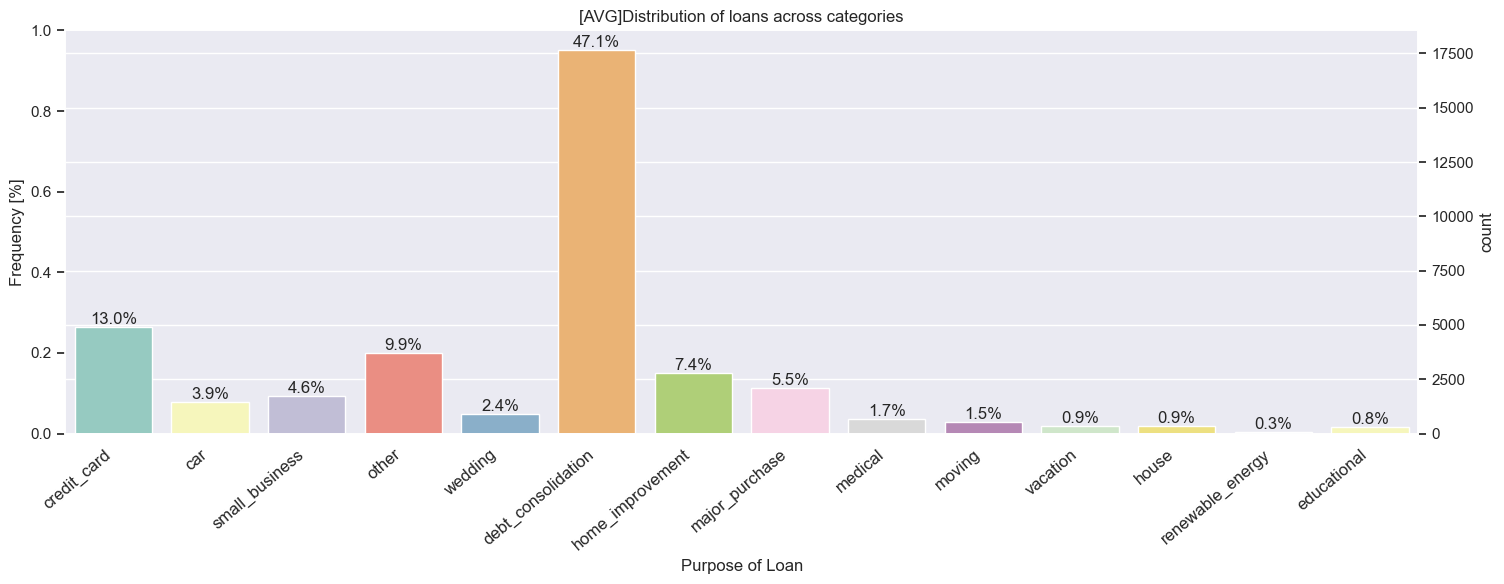

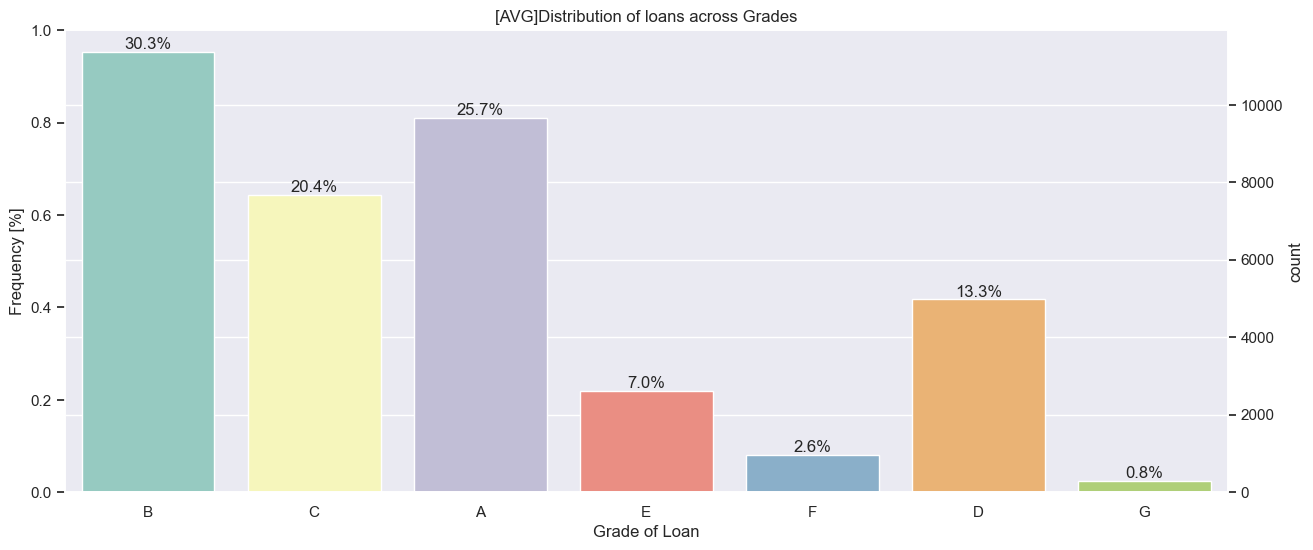

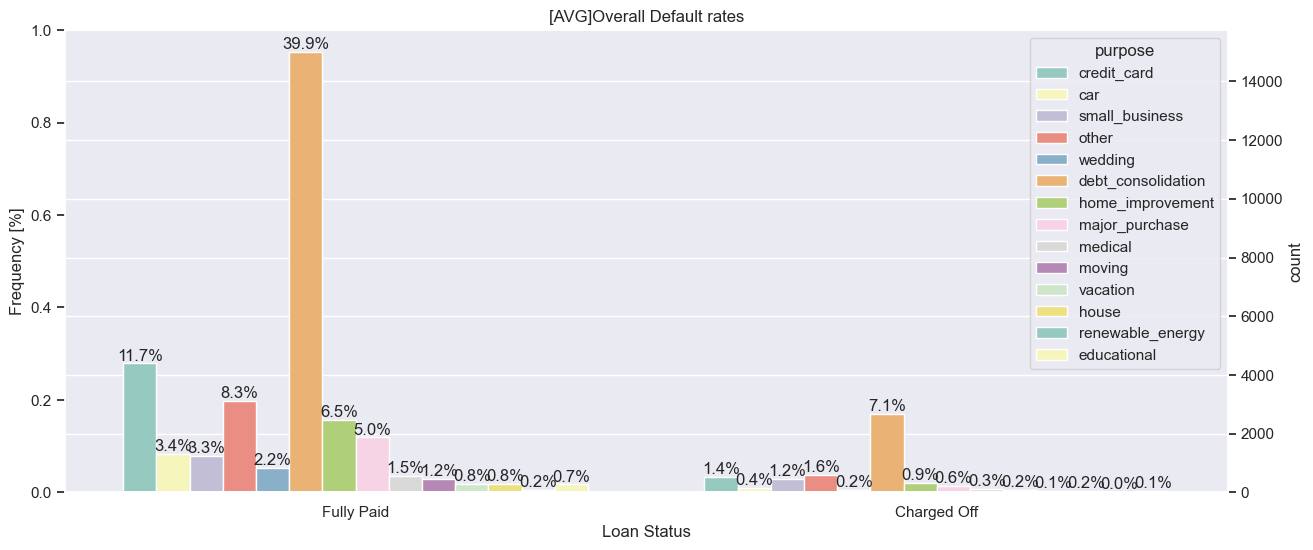

In [36]:
# Plotting average overall default rate

sns.set(style="darkgrid")
#ax = sns.countplot(x="loan_status", data=loans)
def plt_frequency(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(loans)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    
plt_frequency("loan_status",loans,'Loan Status','[AVG]Overall Default Rates')
plt_frequency("issue_year",loans,'Loan Issue Year','[AVG]Overall distribution[Year Over Year]')
plt_frequency("purpose",loans,'Purpose of Loan','[AVG]Distribution of loans across categories',None,1)
plt_frequency("grade",loans,'Grade of Loan','[AVG]Distribution of loans across Grades')
plt_frequency("loan_status",loans,'Loan Status','[AVG]Overall Default rates','purpose')


#### Insights from above plots

1. From above plots we can see that the default rate is 14.4%
2. The number of loan approved has increased Year on Year.
3. People prefer to take high grade loans (like A,B,C) compared to low grade loans.
4. People with 10+ years experience are taking loans more frequently.
5. The following are the top 5 categories where maximum loan applications have been approved and the defaulting probability in these categories could be higher.
    - debt_consolidation
    - credit_card
    - other
    - home_improvement
    - major_purchase
    


#### Deriving New Categorical Variables for Analysis

##### 'dti' Range variable - Higher the dti ratio, lessen the chances of loan getting accepted.
- dti < 10 [LOW]
- dti > 10 and dti < 20 [MEDIUM] 
- dti > 20 [HIGH]

##### Loan-to-income range variable - HIgher the ratio , more chances of defaulting.
- loan_to_annual_income < 0.1 [LOW]
- Less Than 0.1 and Greater Than 0.2 [MEDIUM]
- Greater Than 0.2 [HIGH]

##### Experience category Variable
- <3 years [JUNIOR]
- between 3 - 7 years [MID-SENIOR]
- Greater Than 7 years [SENIOR]

##### Creating a Category List for Analysis
- debt_consolidation
- credit_card
- other
- home_improvement
- major_purchase
- small_business

##### Cleaning 'int_rate' column and removing the '%' and casting the new column to a float

In [37]:
def dti_range_calculator(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'
        
def loan_to_annual_income_range_calculator(loan_to_annual_income):
    if loan_to_annual_income <= 0.10:
        return 'low'
    elif (loan_to_annual_income >0.10 and loan_to_annual_income <= 0.20):
        return 'medium'
    else:
        return 'high'

def experience_level(exp):
    if exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 7):
        return 'Mid-Senior'
    else:
        return 'Senior'
    
category_list = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business']
loans = loans.query('purpose == @category_list')
loans['dti_range'] = loans['dti'].apply(lambda x : dti_range_calculator(x) )
loans['loan_to_annual_income_range'] = loans['loan_to_annual_income'].apply(lambda x : loan_to_annual_income_range_calculator(x) )
loans['exp_level'] = loans['emp_length'].apply(lambda x : experience_level(int(x)))
loans['int_rate_float'] = loans['int_rate'].apply(lambda x : float(x.replace('%','')))

## Univariate Segmented Analysis on New Derived Variables

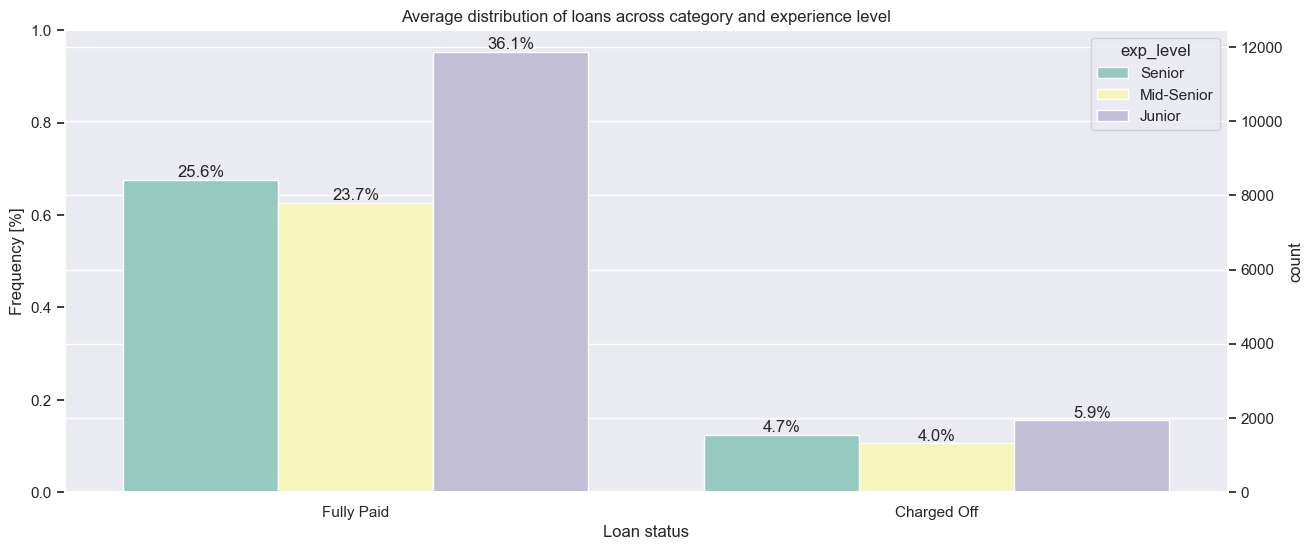

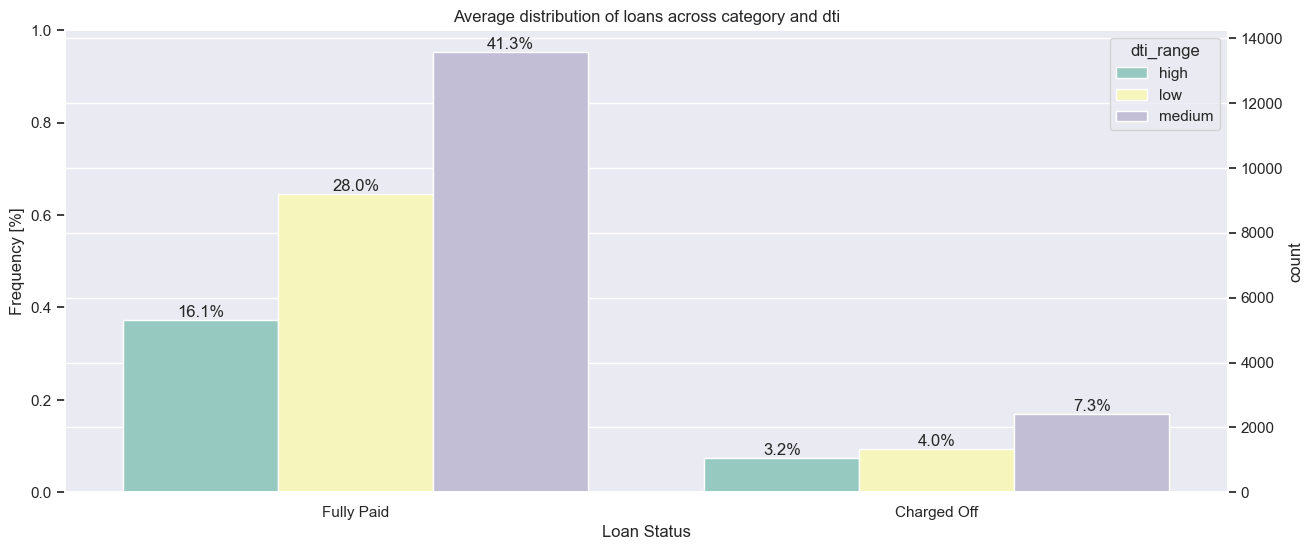

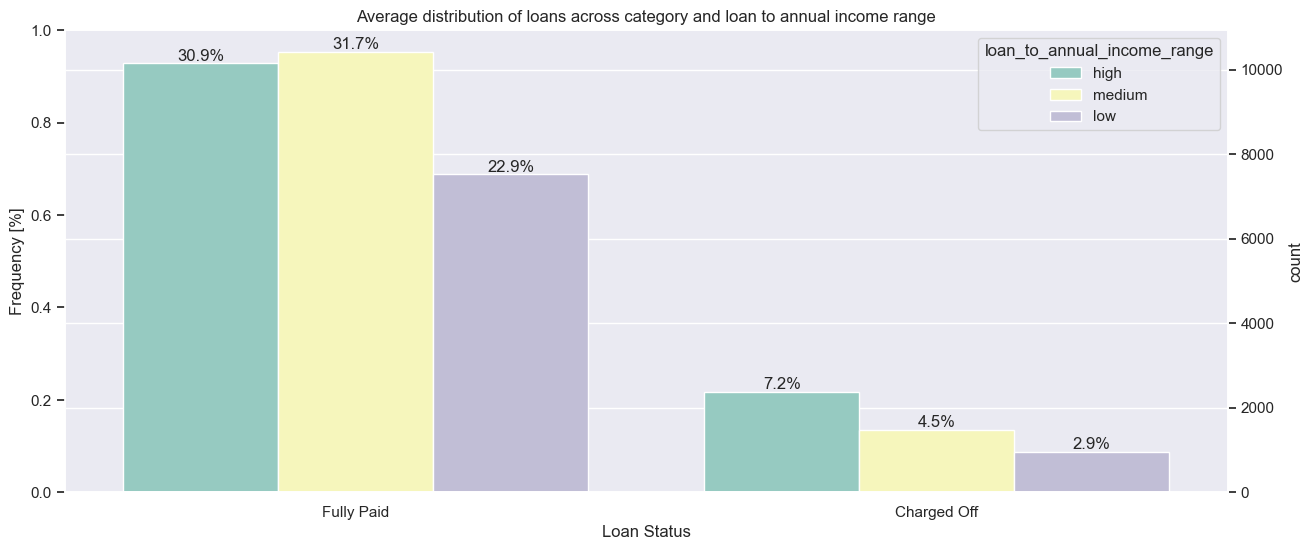

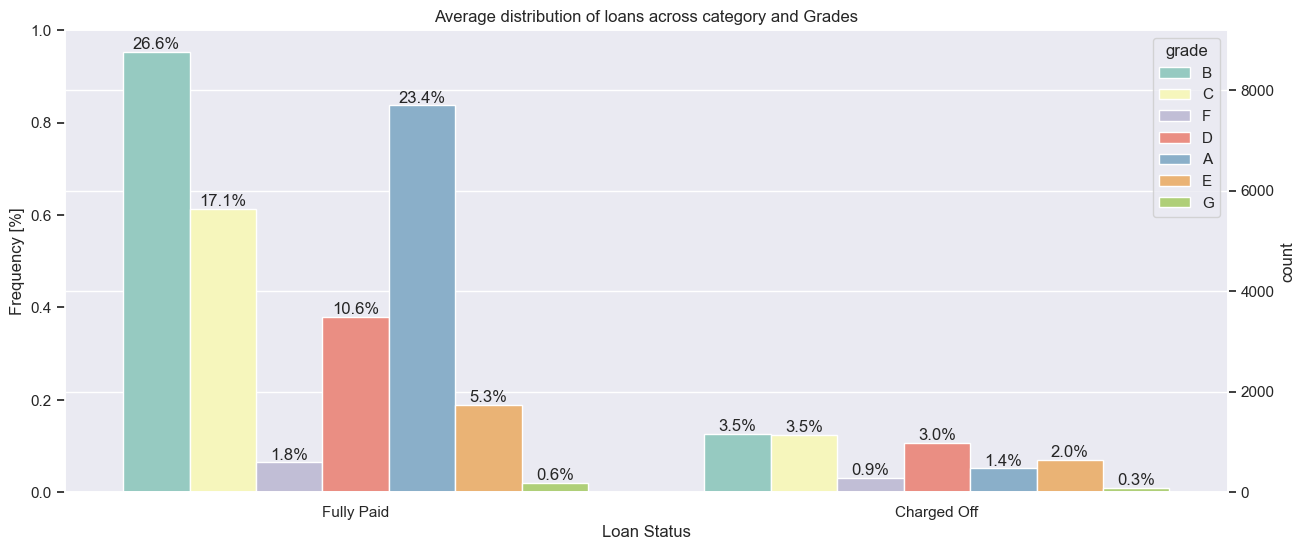

In [38]:
plt_frequency("loan_status",loans,'Loan status','Average distribution of loans across category and experience level','exp_level')
plt_frequency("loan_status",loans,'Loan Status','Average distribution of loans across category and dti','dti_range')
plt_frequency("loan_status",loans,'Loan Status','Average distribution of loans across category and loan to annual income range','loan_to_annual_income_range')
plt_frequency("loan_status",loans,'Loan Status','Average distribution of loans across category and Grades','grade')

#### Analysis

- From the above graphs we can see that people with less experience have higher chance of default.
- People in high 'dti' range have high chances of default.
- People who have high loan to annual income ratio are at high risk of defaulting.
- Although high grades loans like A, B, C are more popular among applicants, the lower grade loans like E,F,G have higher rate of defaults.

#### Bivariate Analysis 

Relationship between Ownership & verified source of income - To get insights on loan defaulting
Cleaning the Verification Status column as Verified and Source Verified into one value as Verified and all other values as Not Verified.

<Axes: title={'center': 'Distribution of Not Verified Source Income on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

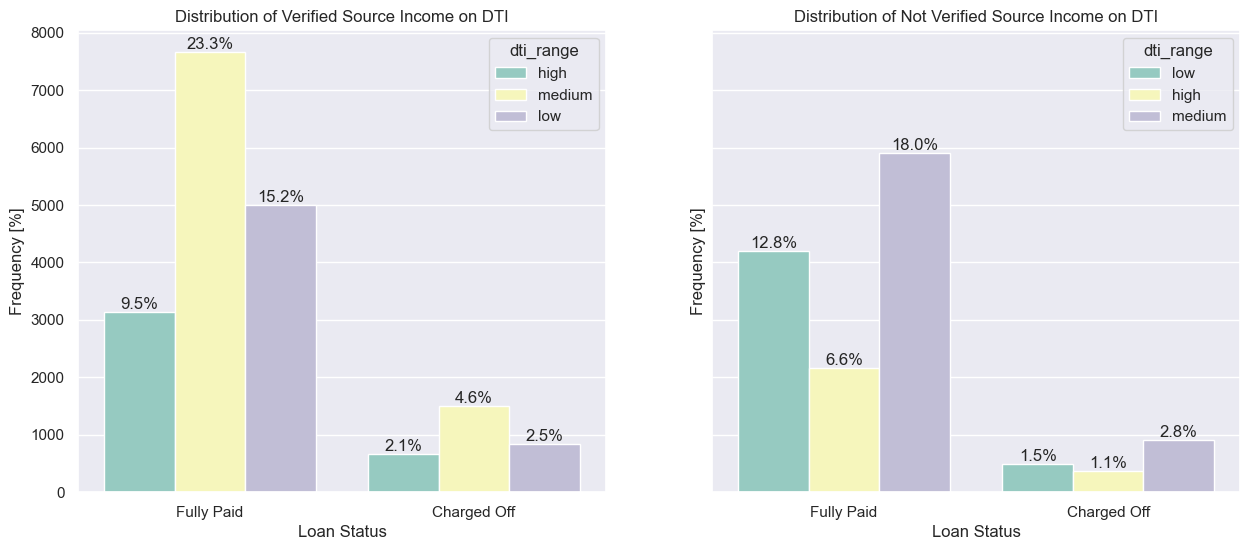

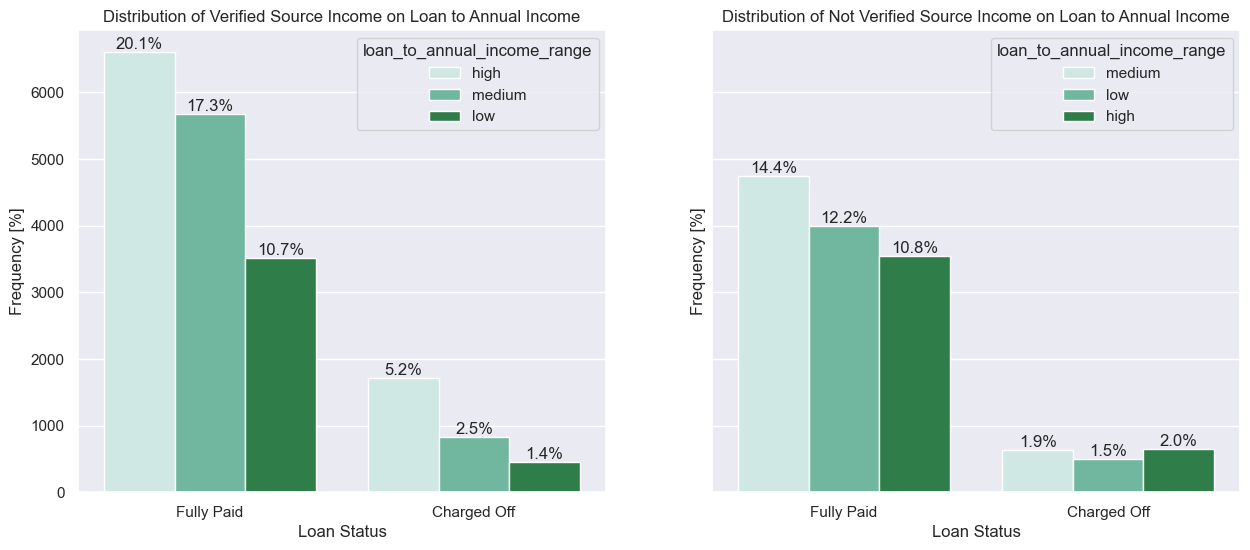

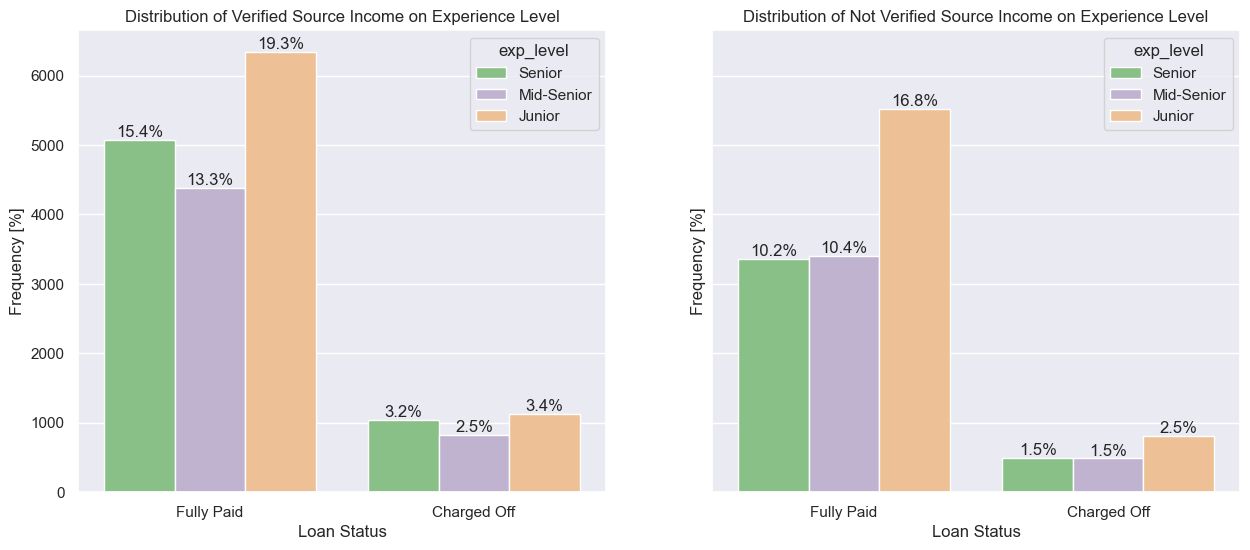

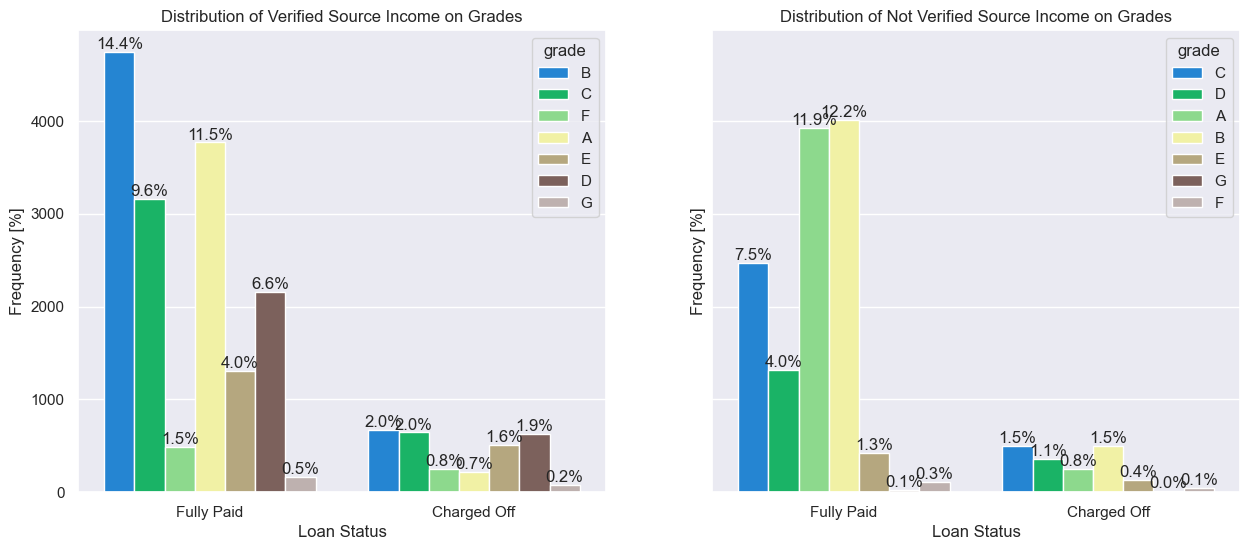

In [39]:
loans['verification_status']= loans['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')

def plt_frequency_subplot(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6,axis=None):
    ncount = len(loans)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax =sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3",ax=axis)
    plt.title(title)
    plt.xlabel(x_label)

    
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    #ax2.grid(None)

def create_subplot(x_var,data_df,x_label,title,hue_var=None,palette_var='Dark2',rot_flag=0,axis=None):
    ncount = len(loans)
    if axis is None:
        axis= plt.gca()  
    bp = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette=palette_var,ax=axis)
    if(rot_flag==1):
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    axis.set_title(title)
    axis.set_xlabel(x_label)
    axis.set_ylabel('Frequency [%]')
    for p in axis.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        axis.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    return bp

# make figure with subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans[loans['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on DTI','dti_range','Set3',0, ax1)
create_subplot('loan_status',loans[loans['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on DTI','dti_range','Set3',0, ax2)   

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans[loans['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Loan to Annual Income','loan_to_annual_income_range','BuGn',0, ax1)
create_subplot('loan_status',loans[loans['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Loan to Annual Income','loan_to_annual_income_range','BuGn',0, ax2)   

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans[loans['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Experience Level','exp_level','Accent',0, ax1)
create_subplot('loan_status',loans[loans['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Experience Level','exp_level','Accent',0, ax2)   

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans[loans['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Grades','grade','terrain',0, ax1)
create_subplot('loan_status',loans[loans['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Grades','grade','terrain',0, ax2)

### Effect of House Ownership

<Axes: title={'center': 'Distribution of Owned Asset on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

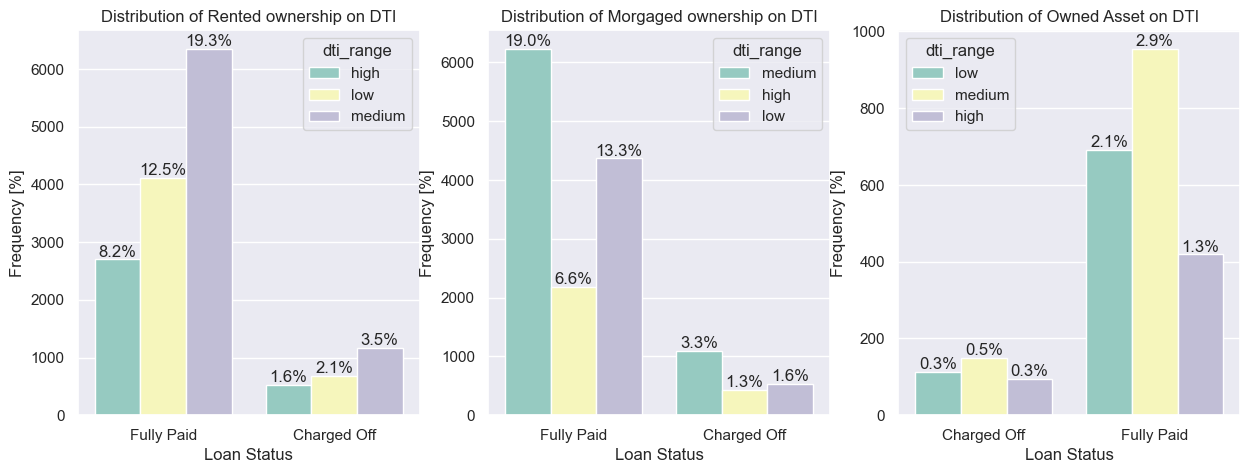

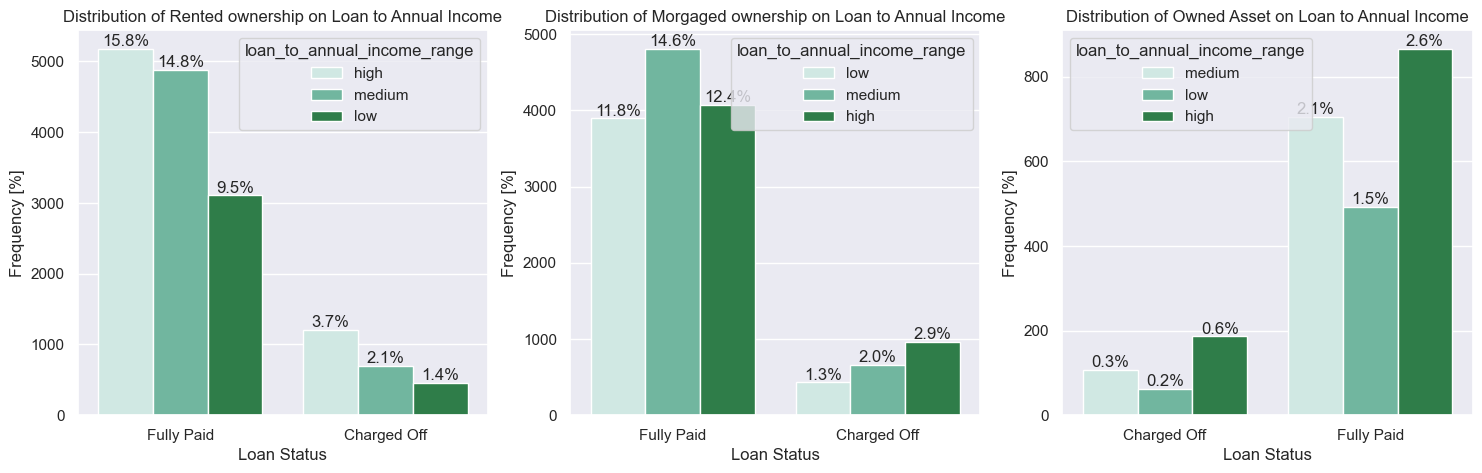

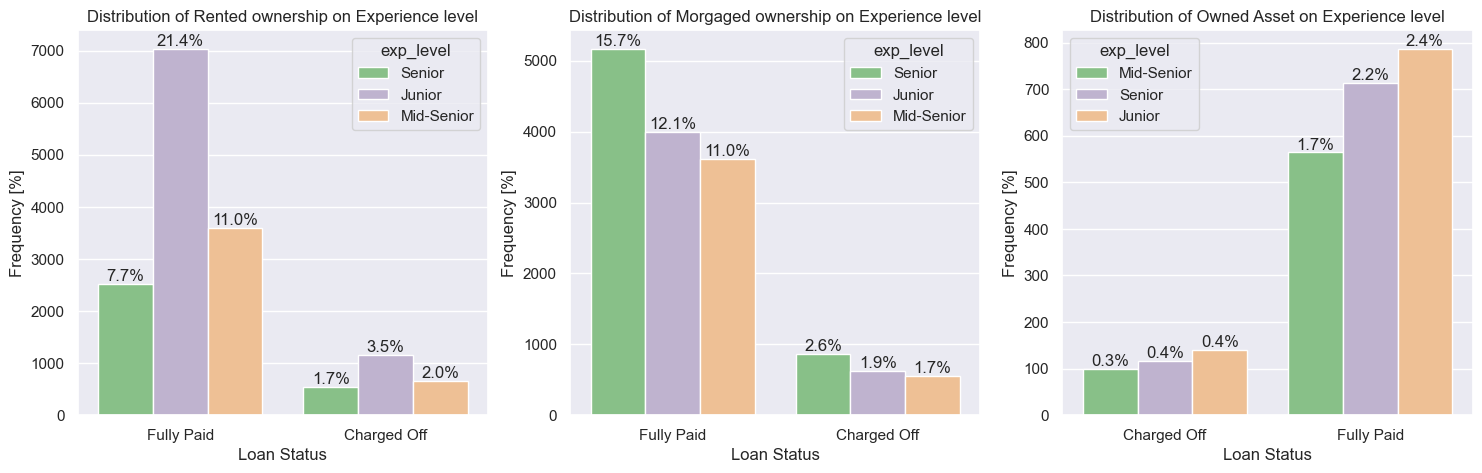

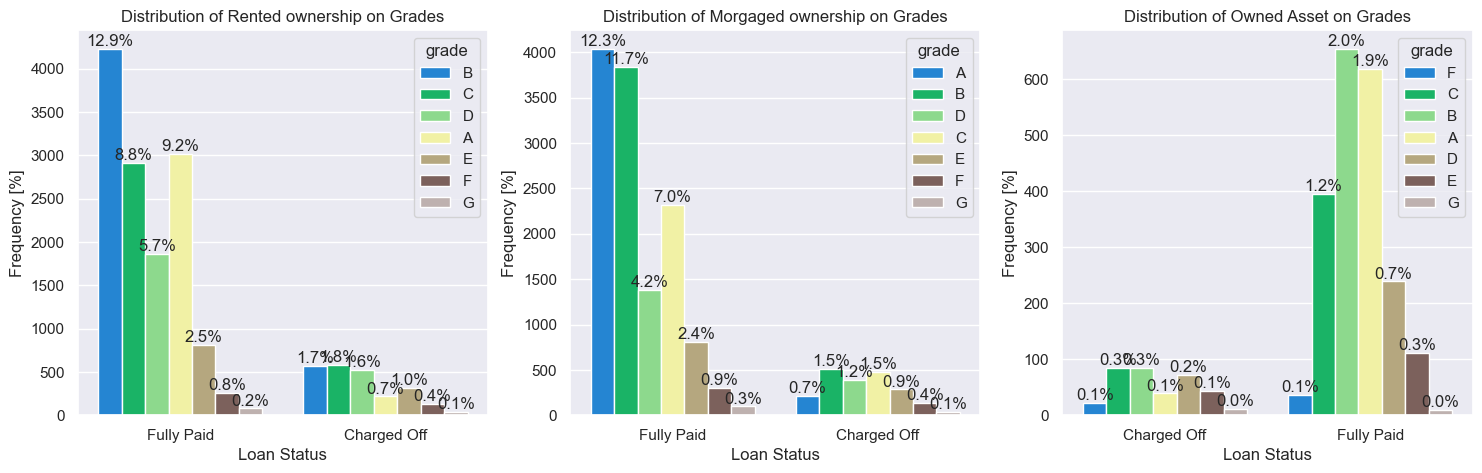

In [40]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
create_subplot('loan_status',loans[loans['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on DTI','dti_range','Set3',0, axs[0])
create_subplot('loan_status',loans[loans['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on DTI','dti_range','Set3',0, axs[1])   
create_subplot('loan_status',loans[loans['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on DTI','dti_range','Set3',0, axs[2])   


fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loans[loans['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Loan to Annual Income','loan_to_annual_income_range','BuGn',0, axs[0])
create_subplot('loan_status',loans[loans['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Loan to Annual Income','loan_to_annual_income_range','BuGn',0, axs[1])   
create_subplot('loan_status',loans[loans['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Loan to Annual Income','loan_to_annual_income_range','BuGn',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loans[loans['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Experience level','exp_level','Accent',0, axs[0])
create_subplot('loan_status',loans[loans['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Experience level','exp_level','Accent',0, axs[1])   
create_subplot('loan_status',loans[loans['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Experience level','exp_level','Accent',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loans[loans['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Grades','grade','terrain',0, axs[0])
create_subplot('loan_status',loans[loans['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Grades','grade','terrain',0, axs[1])   
create_subplot('loan_status',loans[loans['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Grades','grade','terrain',0, axs[2])

#### Variable Correlation
We will filter all the numerical values and will see the correlation of each variable with other quantized variable.

In [41]:
# Filtering all the numerical values to understand their correlation
loans_corr_df = loans.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','loan_to_annual_income_range']) 
cor = loans_corr_df.corr()
round(cor, 3)

C:\Users\HP\AppData\Local\Temp\ipykernel_6492\441963328.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = loans_corr_df.corr()


loan_amnt  funded_amnt  funded_amnt_inv  int_rate_float  \
loan_amnt            1.000        0.981            0.935           0.306   
funded_amnt          0.981        1.000            0.954           0.310   
funded_amnt_inv      0.935        0.954            1.000           0.302   
int_rate_float       0.306        0.310            0.302           1.000   
installment          0.928        0.956            0.901           0.280   
annual_inc           0.258        0.253            0.240           0.048   
dti                  0.057        0.058            0.067           0.110   

                 installment  annual_inc    dti  
loan_amnt              0.928       0.258  0.057  
funded_amnt            0.956       0.253  0.058  
funded_amnt_inv        0.901       0.240  0.067  
int_rate_float         0.280       0.048  0.110  
installment            1.000       0.256  0.046  
annual_inc             0.256       1.000 -0.132  
dti                    0.046      -0.132  1.000

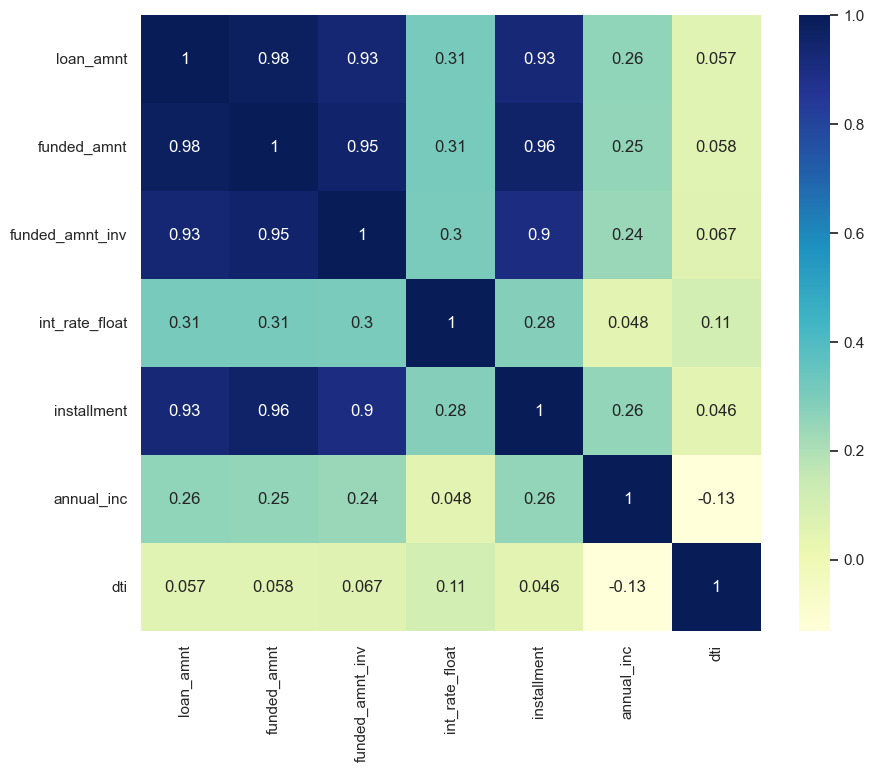

In [42]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

To conclude the EDA of the loan data set, we have analyzed impact of various factors individually as well as in combination with other factors. 

#### Major impact
- Loan grade & sub-grade (D to G)  
- Higher interest rate (above 13%)
- Loan purpose (small business, renewable energy, educational)
- Repayment term (5 years)

#### Combined impact
- High loan amount  interest rate for lower income group
- High installment and longer repayment term
- Home oenership (other) and loan purpose (car, moving or small business)
- Income group and loan purpose
- Residential State and loan purpose

#### MInor Impact
- Higher loan amount (above 16k)
- Higher installment amount (above 327)
- Lower annual income (below 37k)
- Higher debt to income ratio (above 15%)
- Loan issue month (dec, May, Sept)


#### Other factor to be considered:
- Higher revolving line utilization rate (above 58%)
- Missing employment record
- Derogatory public records (1 or 2)
- Public bankruptcy records (1 or 2)

